# Description
This is a dataset of Magic the Gathering decklists which qualified for the 2023 Pro Tour tournament.  
https://www.kaggle.com/datasets/scarfsman/magic-the-gathering-winning-pioneer-decks/data  

### About Magic the Gathering  
Magic the Gathering is a card game played with a deck of 60 cards and a sideboard of 15 cards. These 75 cards are referred to as a player's 'decklist'. No copy of a single card can appear more than four times across a player's decklist. Two players play a a game, which is won by a player reducing their opponent's life points from 20 to zero. A match between two players is won by a player winning two games.  A match is therefore typically no longer than three games. Players may add cards from their sideboard to their main deck inbetween games. At the end of the match players must return their main decks and sideboards to their registered decklist configuration.

### What is a Pro Tour?  
The dataset is comprised of decklists of those players which qualified for an invitation to the Pro Tour of 2023. A Pro Tour is a premier tournament for comeptitive play of Magic the Gathering. The 2023 Pro Tour event had a total prizepool valued at \\$500,000 with a first place cash price of \\$50,000. One of the events in this dataset `Dreamhack Magic Showdown` included tournaments with cash prizes of \\$5k and \\$10k. 
https://magic.gg/news/pro-tour-the-lord-of-the-rings-preview
https://images.ctfassets.net/ryplwhabvmmk/DJPNxAlrmrCNwY5ZB7Fc6/a1e2363f540575f16e5741b149b2280d/1080x1080-Magic-Premier-Play-Path-2022-2023-Infographic.jpg

### Significance of this dataset
Tournament players often look at statistical analysis of different decklists when deciding what strategy they should employ for an upcoming tournament. There are three rough categories a strategy may fall into: aggro, midrange, or control. The rule-of-thumb relationship between these strategies is like rock-paper-scissors: aggro loses to midrange, midrange loses control, control loses to aggro. There are exceptions to this rule-of-thumb, but it is an assumption often made by players.


In [4]:
#pingouin isn't installed in the environment
#install pingouin library
!pip install pingouin

  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached xarray-2024.10.0-py3-none-any.whl.metadata (11 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
Using cached xarray-2024.10.0-py3-none-any.whl (1.2 MB)


In [1]:
#import some useful libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as smw
import numpy as np
import random
import pandas as pd
import pingouin as pg
import seaborn as sns
sns.set()

## Initial Dataset
The table below shows the head and foot of the data table. We can see that the dataset is an aggregate of all the decklists, with each row being a specific card (`Card`) a particular player (`Pilot`) has included in their decklist for a given tournament (`Event`). This isn't very useful to use so we will need to perform some tranformations.

In [2]:
#import data csv file into notebook
data = pd.read_csv('mtgp-data.csv')
data

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,18.83,26.69,mythic
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.31,0.24,uncommon
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\nVoracious Hydra enters the battlefiel...,Creature — Hydra,1.31,4.21,rare
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,2023-06-08,Sideboard,0.0,NaN,[],2021-07-23,"{T}: Add {C}.\n{X}{X}, {T}, Sacrifice Treasure...",Artifact Land,8.55,4.78,rare


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card                  2306 non-null   object 
 1   Quantity              2306 non-null   int64  
 2   Pilot                 2306 non-null   object 
 3   Archetype             2306 non-null   object 
 4   Event                 2306 non-null   object 
 5   Date Posted           2306 non-null   object 
 6   Main/Sideboard        2306 non-null   object 
 7   Mana Value            2306 non-null   float64
 8   Mana Cost             1679 non-null   object 
 9   Colours               2306 non-null   object 
 10  Most Recent Printing  2306 non-null   object 
 11  Card Text             2096 non-null   object 
 12  Type Line             2306 non-null   object 
 13  Price EUR             2160 non-null   float64
 14  Price USD             2231 non-null   float64
 15  Rarity               

In [7]:
print(data['Archetype'].value_counts()['Azorius Control'])

308


### Cleaning and Transformation
There is a major problem with this dataset we must address: Decklists don't have a UID.
Pilot names have been anonymised.  
An event could have multiple players playing the same archetype.
Two decks of the same archetype don't nessecarily have the same contents (ie decklist).  

First let's check how many indidivual players have qualified for the Pro Tour 

In [22]:
#create dataframe from data variable
df = pd.DataFrame(data)

#selects the items in the dataframe which have unique Pilot and Event
# combinations.
unique_tournament_pilot = df.drop_duplicates(subset=['Pilot', 'Event'])
#The .shape[0] function returns the magnitude, ie how many have been selected
print('Number of unique pilot-event combinations: ', unique_tournament_pilot.shape[0])


Number of unique pilot-event combinations:  72


Now we know 72 is the number of rows we want, as this represents the number of indidivual players which this dataset details the decklists for.

We're interested in looking at the spread of archetypes in this dataset.  so let's Below we create a new table from the dataframe with 


In [23]:
#trim_df = df[['Pilot', 'Event']]
#['Card'].apply(list).reset_index()
unique_tournament_pilot

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
38,Arboreal Grazer,4,Pilot 2,Lotus Field Combo,MTG China Open,2023-06-06,Mainboard,1.0,{G},['G'],2019-05-03,Reach\nWhen Arboreal Grazer enters the battlef...,Creature — Beast,0.19,0.26,common
72,Atarka's Command,4,Pilot 3,Atarka Red,MTG China Open,2023-06-06,Mainboard,2.0,{R}{G},"['G', 'R']",2022-07-08,Choose two —\n• Your opponents can't gain life...,Instant,0.50,1.20,rare
102,Lair of the Hydra,2,Pilot 4,Mono-Green Devotion,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2021-07-23,"If you control two or more other lands, Lair o...",Land,2.95,1.52,rare
132,Arboreal Grazer,3,Pilot 5,Lotus Field Combo,MTG China Open,2023-06-06,Mainboard,1.0,{G},['G'],2019-05-03,Reach\nWhen Arboreal Grazer enters the battlef...,Creature — Beast,0.19,0.26,common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,Coppercoat Vanguard,4,Pilot 4,Mono-White Humans,MTG SEA Championship,2023-06-08,Mainboard,2.0,{1}{W},['W'],2023-05-12,Each other Human you control gets +1/+0 and ha...,Creature — Human Soldier,0.43,0.50,uncommon
2160,Duress,1,Pilot 5,Rakdos Midrange,MTG SEA Championship,2023-06-08,Mainboard,1.0,{B},['B'],2023-02-03,Target opponent reveals their hand. You choose...,Sorcery,0.13,0.03,common
2194,Mutavault,3,Pilot 6,Rakdos Midrange,MTG SEA Championship,2023-06-08,Mainboard,0.0,NaN,[],2022-06-10,{T}: Add {C}.\n{1}: Mutavault becomes a 2/2 cr...,Land,9.03,7.24,rare
2230,Absorb,3,Pilot 7,Azorius Control,MTG SEA Championship,2023-06-08,Mainboard,3.0,{W}{U}{U},"['U', 'W']",2019-01-25,Counter target spell. You gain 3 life.,Instant,0.82,0.35,rare


In [31]:
#create a new selection of the dataframe 
#df['Card_with_quantity'] = df['Quantity'].astype(str) + ' ' + df['Card']
#group2_df = df.groupby(['Pilot', 'Event', 'Archetype'])['Card_with_quantity'].agg(', '.join).reset_index()
#trim_df = df.groupby(['Pilot', 'Event'])['Archetype'].reset_index()
new_df = unique_tournament_pilot[['Pilot','Event', 'Archetype']].copy().reset_index()
new_df = new_df.drop('index', axis=1)
new_df

,Pilot,Event,Archetype
0,Pilot 1,MTG China Open,Azorius Control
1,Pilot 2,MTG China Open,Lotus Field Combo
2,Pilot 3,MTG China Open,Atarka Red
3,Pilot 4,MTG China Open,Mono-Green Devotion
4,Pilot 5,MTG China Open,Lotus Field Combo
...,...,...,...
67,Pilot 4,MTG SEA Championship,Mono-White Humans
68,Pilot 5,MTG SEA Championship,Rakdos Midrange
69,Pilot 6,MTG SEA Championship,Rakdos Midrange
70,Pilot 7,MTG SEA Championship,Azorius Control


In [32]:
new_df.describe()

,Pilot,Event,Archetype
count,72,72,72
unique,48,4,23
top,Pilot 1,Dreamhack Magic Showdown,Mono-Green Devotion
freq,4,48,12


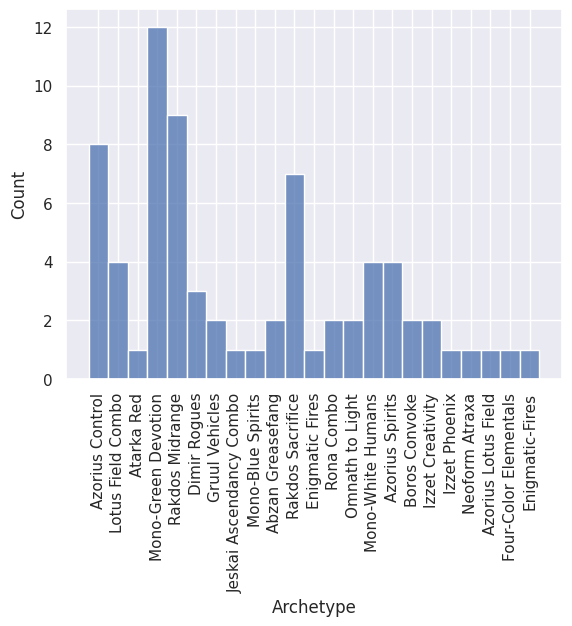

In [34]:
sns.histplot(x=new_df['Archetype'])
plt.xticks(rotation=90)
plt.show()

In [1]:
#a = 
#b = 
#aov = smf.ols('a ~ C(b)', data=data).fit()


### Cool stuff

In [3]:
#plt.xticks(rotation=90)
#rating_order = ['no factual content', 'mostly false', 'mixture of true and false', 'mostly true']
#sns.pointplot(x = 'Rating', y = 'comment_count', hue = 'Category', order = rating_order, data=posts, linestyle = 'none')


In [2]:
#plot both histograms on the same graph
#plt.hist(posts['rating_int'], alpha=0.5, label='rating_int')
#sns.histplot(x = 'rating_int', hue = 'Category', data=posts, join=False)
#sns.histplot(x='Category', y= 'rating_int', data=posts)
#sns.barplot(x = 'rating_int', hue = 'Category', data=posts, join=False)
#plt.show()


In [5]:
#df = pd.DataFrame(posts)
#left_posts = posts['Category[left]'].shape[0]

#print(posts['Category'].value_counts()['left'])
#posts.describe()
#vars(posts['Rating'])

#print(posts['Rating'].__dict__)


In [6]:
#import matplotlib.pyplot as plt
#from scipy.stats import bootstrap
#data = (posts['rating_int'],)  # samples must be in a sequence
#res = bootstrap(data, np.std, confidence_level=0.9)
#fig, ax = plt.subplots()
#ax.hist(res.bootstrap_distribution, bins=25)
#ax.set_title('Bootstrap Distribution')
#ax.set_xlabel('statistic value')
#ax.set_ylabel('frequency')
#plt.show()


In [7]:
#print(posts['Rating'].value_counts()['mostly false'])
